In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [84]:
#Chuyển file csv thành dataframe
raw_df = pd.read_csv('../Data/adidasVN.csv')


In [85]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        300 non-null    int64  
 1   text                           263 non-null    object 
 2   post_text                      263 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           300 non-null    object 
 6   timestamp                      300 non-null    int64  
 7   image                          149 non-null    object 
 8   image_lowquality               300 non-null    object 
 9   images                         277 non-null    object 
 10  images_description             277 non-null    object 
 11  images_lowquality              300 non-null    object 
 12  images_lowquality_description  300 non-null    obj

In [86]:
raw_df.columns

Index(['post_id', 'text', 'post_text', 'shared_text', 'original_text', 'time',
       'timestamp', 'image', 'image_lowquality', 'images',
       'images_description', 'images_lowquality',
       'images_lowquality_description', 'video', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'likes', 'comments',
       'shares', 'post_url', 'link', 'links', 'user_id', 'username',
       'user_url', 'is_live', 'factcheck', 'shared_post_id', 'shared_time',
       'shared_user_id', 'shared_username', 'shared_post_url', 'available',
       'comments_full', 'reactors', 'w3_fb_url', 'reactions', 'reaction_count',
       'with', 'page_id', 'sharers', 'image_id', 'image_ids', 'was_live',
       'fetched_time'],
      dtype='object')

In [87]:
raw_df.isnull().sum()

post_id                            0
text                              37
post_text                         37
shared_text                      300
original_text                    300
time                               0
timestamp                          0
image                            151
image_lowquality                   0
images                            23
images_description                23
images_lowquality                  0
images_lowquality_description      0
video                            178
video_duration_seconds           300
video_height                     300
video_id                         178
video_quality                    300
video_size_MB                    300
video_thumbnail                  178
video_watches                    300
video_width                      300
likes                            114
comments                           0
shares                             0
post_url                           0
link                             146
l

## Lọc dữ liệu

In [88]:
# Loại bỏ các cột không cần thiết cho việc phân tích dữ liệu
raw_df = raw_df.drop(['shared_text', 'original_text',
       'image_lowquality', 'images', 'images_description', 'images_lowquality',
       'images_lowquality_description', 'video_duration_seconds',
       'video_height', 'video_id', 'video_quality', 'video_size_MB',
       'video_thumbnail', 'video_watches', 'video_width', 'post_url', 'user_id', 'link', 'links', 
       'username', 'user_url', 'is_live', 'factcheck', 'shared_post_id', 
       'shared_time', 'shared_user_id', 'shared_username', 'shared_post_url', 
       'available', 'reactors', 'w3_fb_url', 'with', 'page_id', 'sharers', 'image_id', 
       'image_ids', 'was_live', 'fetched_time','likes'], axis='columns')

In [89]:
raw_df = raw_df.dropna(subset=['reactions'])
raw_df = raw_df.reset_index(drop=True)


In [90]:
raw_df.isnull().sum()

post_id            0
text               3
post_text          3
time               0
timestamp          0
image             49
video             88
comments           0
shares             0
comments_full      0
reactions          0
reaction_count     0
dtype: int64

In [91]:
raw_df.shape

(122, 12)

In [92]:
raw_df['video'].isna().sum()

88

## Tất cả các post

In [93]:
raw_df[['post_id','post_text']]

post_id                                          post_text
0     661970039415845  Dù bạn là ai, dù trong hoàn cảnh nào, sự nguyê...
1     661909519421897  💚💚 adidas Runners Saigon tròn 5 tuổi và hành t...
2     661354702810712  🔥🔥 1/12/2023 - CẶP ĐÔI GIÀY CHẠY BỘ ĐƯỢC MONG ...
3     661308529481996  👟 1,600,000 VNĐ – Đó là giá của đôi giày với t...
4     660382439574605  ⚡️⚡️ CHỈ CÒN 01 NGÀY, KHÉP LẠI MÙA SALE BLACK ...
..                ...                                                ...
117  6609716075733776  GIÁ TRỊ VƯỢT THỜI GIAN, VẺ ĐẸP VƯỢT KHÔNG GIAN...
118  6596479233724127  🤟🤟 TÁO BẠO, LÀ DECAO\n\nTáo bạo, tạo tên tuổi....
119  6589756037729780  Khi cả thế giới dõi theo từng nhịp lăn của trá...
120  6555373427834708  Thoải mái tối ưu,\nNâng đỡ tuyệt đỉnh,\nTập tr...
121  6494372433934808  🔥🔥 VỚI HIIT, DỄ CHỊU LÀ ĐIỀU CÓ THỂ!\n\nThoải ...

[122 rows x 2 columns]

## Lượt tương tác theo từng post

In [94]:
raw_df[['post_id','time','reaction_count']]

post_id                 time  reaction_count
0     661970039415845  2023-11-29 20:35:41              33
1     661909519421897  2023-11-29 18:15:24              38
2     661354702810712  2023-11-28 20:00:04             169
3     661308529481996  2023-11-28 14:05:18             249
4     660382439574605  2023-11-26 18:00:35              76
..                ...                  ...             ...
117  6609716075733776  2023-08-01 18:31:41              35
118  6596479233724127  2023-07-28 14:18:49             102
119  6589756037729780  2023-07-26 14:22:50              21
120  6555373427834708  2023-07-16 12:26:12              21
121  6494372433934808  2023-06-28 20:30:11              26

[122 rows x 3 columns]

In [95]:
# Số lượng reactions của bài viết có nhiều reations nhất
raw_df['reaction_count'].max()

675

In [96]:
#Số lượng reactions của bài viết có ít reacitons nhất
raw_df['reaction_count'].min()

12

In [97]:
#Trung bình reactions một bài viết
raw_df['reaction_count'].mean()

134.90983606557376

In [98]:
#Các thông số cơ bản reactions, shares, comments
hello = raw_df[['shares','comments','reaction_count']]
hello.describe()

shares    comments  reaction_count
count  122.000000  122.000000      122.000000
mean     2.762295   11.688525      134.909836
std      5.646696   13.954520      130.227900
min      0.000000    0.000000       12.000000
25%      0.000000    2.000000       47.250000
50%      1.000000    6.000000       96.000000
75%      3.000000   15.750000      173.750000
max     46.000000   76.000000      675.000000

## Biểu đồ thể hiện tương tác theo thời gian

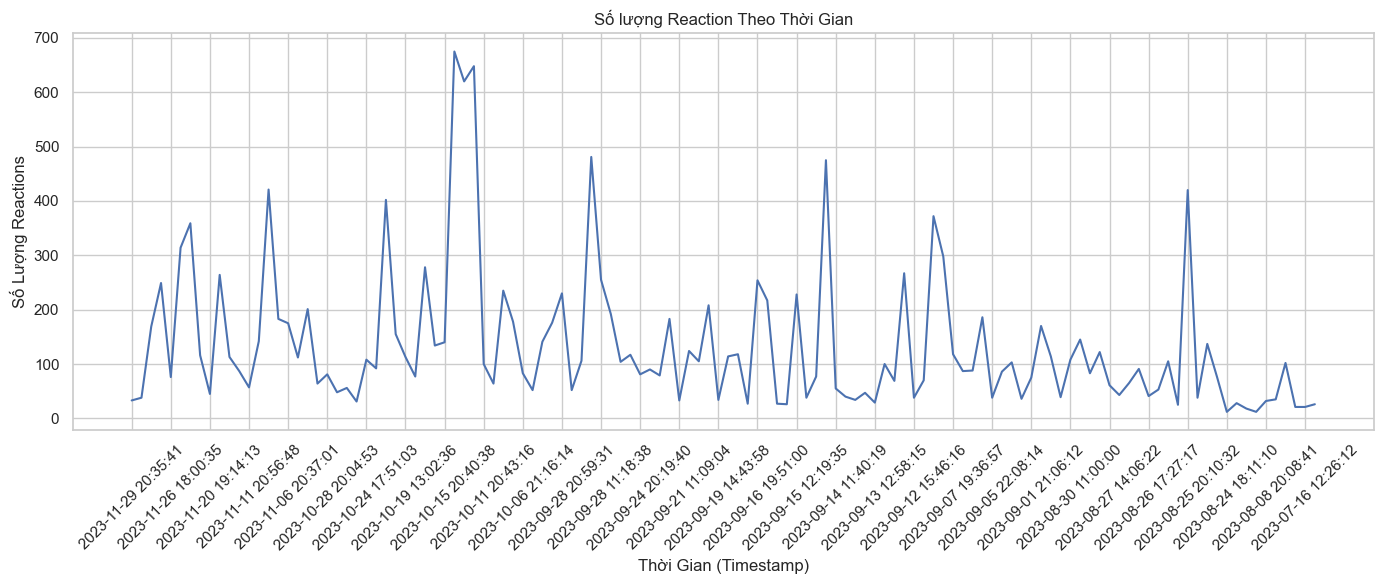

In [99]:
plt.figure(figsize=(14,6))
plt.plot(raw_df['time'], raw_df['reaction_count'], color='b') 
plt.xlabel('Thời Gian (Timestamp)')  
plt.ylabel('Số Lượng Reactions')  
plt.title('Số lượng Reaction Theo Thời Gian')  
plt.grid(True)  
plt.xticks(rotation=45)
every_nth_timestamp = 4
plt.xticks(raw_df['time'][::every_nth_timestamp]) 
plt.tight_layout()  
plt.show()

## Sự tương quan giữa lượt shares và reacts

In [100]:
raw_df[['post_id','shares','reaction_count']]

post_id  shares  reaction_count
0     661970039415845       1              33
1     661909519421897       7              38
2     661354702810712       5             169
3     661308529481996       8             249
4     660382439574605       2              76
..                ...     ...             ...
117  6609716075733776       0              35
118  6596479233724127       0             102
119  6589756037729780       0              21
120  6555373427834708       0              21
121  6494372433934808       0              26

[122 rows x 3 columns]

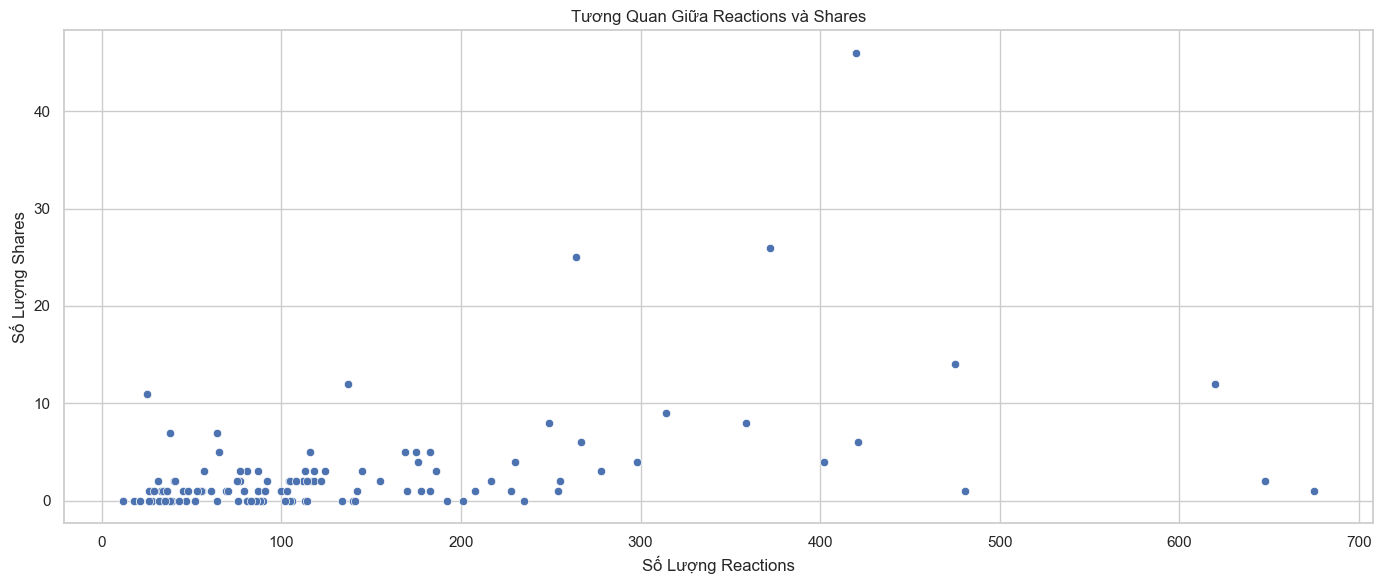

In [101]:
sns.set(style ="whitegrid")
plt.figure(figsize=(14, 6))
sns.scatterplot(x='reaction_count', y='shares', data=raw_df)  

plt.xlabel('Số Lượng Reactions') 
plt.ylabel('Số Lượng Shares')  
plt.title('Tương Quan Giữa Reactions và Shares')  

plt.tight_layout() 
plt.show() 

## Sự tương quan giữa lượt reacts và comments


In [102]:
raw_df[['post_id','comments','reaction_count']]

post_id  comments  reaction_count
0     661970039415845         5              33
1     661909519421897         2              38
2     661354702810712        23             169
3     661308529481996        22             249
4     660382439574605        76              76
..                ...       ...             ...
117  6609716075733776         0              35
118  6596479233724127         0             102
119  6589756037729780         0              21
120  6555373427834708         0              21
121  6494372433934808         0              26

[122 rows x 3 columns]

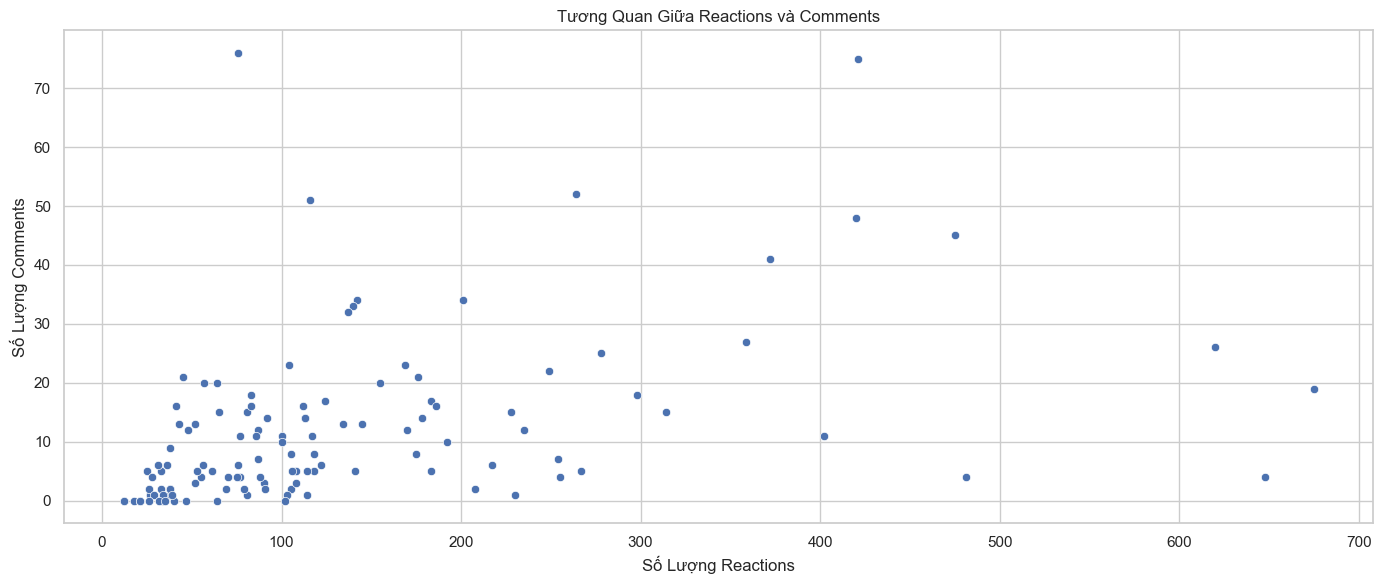

In [103]:
sns.set(style ="whitegrid")
plt.figure(figsize=(14, 6))
sns.scatterplot(x='reaction_count', y='comments', data=raw_df)  

plt.xlabel('Số Lượng Reactions') 
plt.ylabel('Số Lượng Comments')  
plt.title('Tương Quan Giữa Reactions và Comments')  

plt.tight_layout() 
plt.show() 

## Các react cụ thể được sử dụng và chuẩn hóa dữ liệu



In [104]:
reaction_df = raw_df['reactions'].apply(eval).apply(pd.Series)
df_with_detailed_reactions = pd.concat([raw_df,reaction_df],axis=1).drop('reactions',axis=1)
df_with_detailed_reactions[['post_id','post_text','thích','yêu thích','haha','wow','phẫn nộ','thương thương']]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_36960\1461487598.py:1: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  reaction_df = raw_df['reactions'].apply(eval).apply(pd.Series)


post_id                                          post_text  \
0     661970039415845  Dù bạn là ai, dù trong hoàn cảnh nào, sự nguyê...   
1     661909519421897  💚💚 adidas Runners Saigon tròn 5 tuổi và hành t...   
2     661354702810712  🔥🔥 1/12/2023 - CẶP ĐÔI GIÀY CHẠY BỘ ĐƯỢC MONG ...   
3     661308529481996  👟 1,600,000 VNĐ – Đó là giá của đôi giày với t...   
4     660382439574605  ⚡️⚡️ CHỈ CÒN 01 NGÀY, KHÉP LẠI MÙA SALE BLACK ...   
..                ...                                                ...   
117  6609716075733776  GIÁ TRỊ VƯỢT THỜI GIAN, VẺ ĐẸP VƯỢT KHÔNG GIAN...   
118  6596479233724127  🤟🤟 TÁO BẠO, LÀ DECAO\n\nTáo bạo, tạo tên tuổi....   
119  6589756037729780  Khi cả thế giới dõi theo từng nhịp lăn của trá...   
120  6555373427834708  Thoải mái tối ưu,\nNâng đỡ tuyệt đỉnh,\nTập tr...   
121  6494372433934808  🔥🔥 VỚI HIIT, DỄ CHỊU LÀ ĐIỀU CÓ THỂ!\n\nThoải ...   

     thích  yêu thích  haha  wow  phẫn nộ  thương thương  
0     32.0        1.0   NaN  NaN      NaN            NaN  
1     21.0       16.0   NaN  NaN      NaN            1.0  
2    147.0        5.0  15.0  1.0      NaN            1.0  
3    234.0       14.0   NaN  NaN      1.0            NaN  
4     72.0        3.0   NaN  NaN      1.0            NaN  
..     ...        ...   ...  ...      ...            ...  
117    NaN        NaN   NaN  NaN      NaN            NaN  
118    NaN        NaN   NaN  NaN      NaN            NaN  
119    NaN        NaN   NaN  NaN      NaN            NaN  
120    NaN        NaN   NaN  NaN      NaN            NaN  
121    NaN        NaN   NaN  NaN      NaN            NaN  

[122 rows x 8 columns]

In [105]:
# Chuẩn hóa lại các cột biểu cảm NaN
for i in range(len(df_with_detailed_reactions)):
    if pd.isna(df_with_detailed_reactions['thích'].values[i]):
        df_with_detailed_reactions['thích'].values[i]=0
    if pd.isna(df_with_detailed_reactions['yêu thích'].values[i]):
        df_with_detailed_reactions['yêu thích'].values[i]=0
    if pd.isna(df_with_detailed_reactions['haha'].values[i]):
        df_with_detailed_reactions['haha'].values[i]=0
    if pd.isna(df_with_detailed_reactions['wow'].values[i]):
        df_with_detailed_reactions['wow'].values[i]=0
    if pd.isna(df_with_detailed_reactions['phẫn nộ'].values[i]):
        df_with_detailed_reactions['phẫn nộ'].values[i]=0
    if pd.isna(df_with_detailed_reactions['thương thương'].values[i]):
        df_with_detailed_reactions['thương thương'].values[i]=0
df_with_detailed_reactions[['post_id','post_text','thích','yêu thích','haha','wow','phẫn nộ','thương thương']]

post_id                                          post_text  \
0     661970039415845  Dù bạn là ai, dù trong hoàn cảnh nào, sự nguyê...   
1     661909519421897  💚💚 adidas Runners Saigon tròn 5 tuổi và hành t...   
2     661354702810712  🔥🔥 1/12/2023 - CẶP ĐÔI GIÀY CHẠY BỘ ĐƯỢC MONG ...   
3     661308529481996  👟 1,600,000 VNĐ – Đó là giá của đôi giày với t...   
4     660382439574605  ⚡️⚡️ CHỈ CÒN 01 NGÀY, KHÉP LẠI MÙA SALE BLACK ...   
..                ...                                                ...   
117  6609716075733776  GIÁ TRỊ VƯỢT THỜI GIAN, VẺ ĐẸP VƯỢT KHÔNG GIAN...   
118  6596479233724127  🤟🤟 TÁO BẠO, LÀ DECAO\n\nTáo bạo, tạo tên tuổi....   
119  6589756037729780  Khi cả thế giới dõi theo từng nhịp lăn của trá...   
120  6555373427834708  Thoải mái tối ưu,\nNâng đỡ tuyệt đỉnh,\nTập tr...   
121  6494372433934808  🔥🔥 VỚI HIIT, DỄ CHỊU LÀ ĐIỀU CÓ THỂ!\n\nThoải ...   

     thích  yêu thích  haha  wow  phẫn nộ  thương thương  
0     32.0        1.0   0.0  0.0      0.0            0.0  
1     21.0       16.0   0.0  0.0      0.0            1.0  
2    147.0        5.0  15.0  1.0      0.0            1.0  
3    234.0       14.0   0.0  0.0      1.0            0.0  
4     72.0        3.0   0.0  0.0      1.0            0.0  
..     ...        ...   ...  ...      ...            ...  
117    0.0        0.0   0.0  0.0      0.0            0.0  
118    0.0        0.0   0.0  0.0      0.0            0.0  
119    0.0        0.0   0.0  0.0      0.0            0.0  
120    0.0        0.0   0.0  0.0      0.0            0.0  
121    0.0        0.0   0.0  0.0      0.0            0.0  

[122 rows x 8 columns]

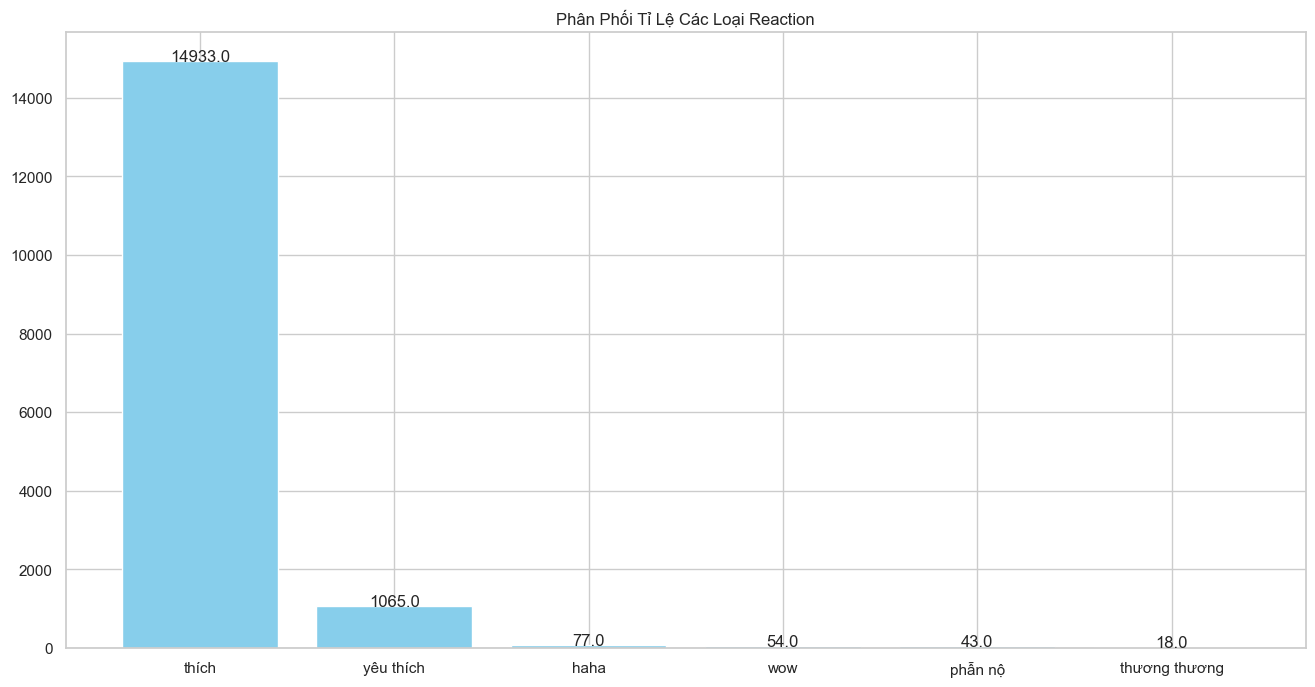

In [106]:
reaction_counts = df_with_detailed_reactions[['thích', 'yêu thích', 'haha', 'wow', 'phẫn nộ', 'thương thương']]
reaction_totals = reaction_counts.sum()
reaction_totals_df = reaction_totals.to_frame(name='Số lượng').reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(16, 8))
plt.bar(x=reaction_totals_df['index'], height=reaction_totals_df['Số lượng'], color='skyblue')

for i, v in enumerate(reaction_totals_df['Số lượng']):
    plt.text(i, v + 0.1, str(v), ha='center')
plt.title('Phân Phối Tỉ Lệ Các Loại Reaction')
plt.show()

## Biểu đồ thể hiện số lượng reacts phổ biến, comments và shares theo thời gian


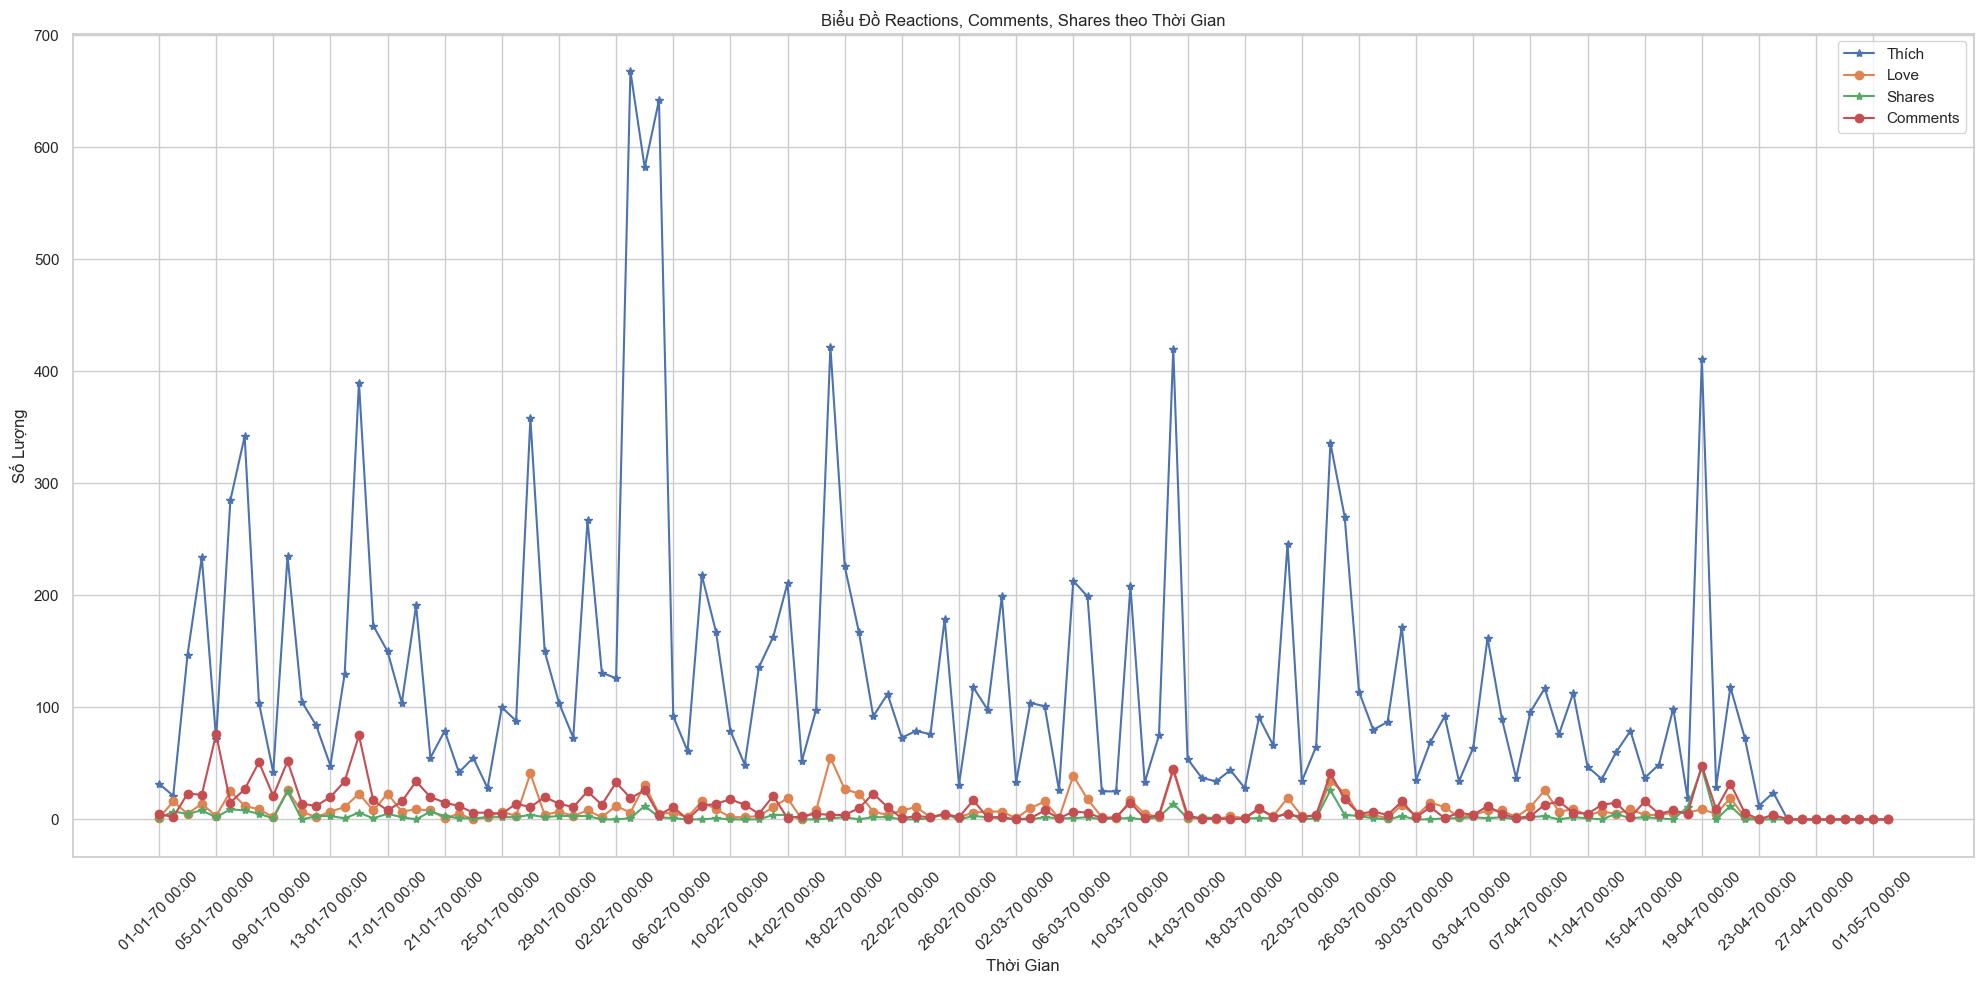

In [107]:
from matplotlib.dates import DateFormatter
plt.figure(figsize=(20, 10))


plt.plot(df_with_detailed_reactions['time'], df_with_detailed_reactions['thích'], label="Thích", marker="*")
plt.plot(df_with_detailed_reactions['time'], df_with_detailed_reactions['yêu thích'], label="Love", marker="o")
plt.plot(df_with_detailed_reactions['time'], df_with_detailed_reactions['shares'], label="Shares", marker="*")
plt.plot(df_with_detailed_reactions['time'], df_with_detailed_reactions['comments'], label="Comments", marker="o")

plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))
plt.xlabel('Thời Gian')
plt.ylabel('Số Lượng')
plt.title('Biểu Đồ Reactions, Comments, Shares theo Thời Gian')

plt.xticks(rotation=45)
every_nth_timestamp = 4
plt.xticks(df_with_detailed_reactions['time'][::every_nth_timestamp])
plt.tight_layout() 
plt.show()


## Các hình thức đăng bài (ảnh hay video)

In [108]:
a = raw_df['image'].count()
b = raw_df['video'].count()
print('Số bài đăng có hình ảnh', a)
print('Số bài đăng có video', b)

a = df_with_detailed_reactions
for i in range(len(a)-1,-1,-1):
    if pd.isna(a['image'].values[i]):
        a = a.drop(i,axis=0).reset_index(drop=True)
b = df_with_detailed_reactions
for i in range(len(b)-1,-1,-1):
    if pd.isna(b['video'].values[i]):
        b = b.drop(i,axis=0).reset_index(drop=True)
print()
reaction_counts_with_image = a[['thích', 'yêu thích', 'haha', 'wow', 'phẫn nộ', 'thương thương']]
reaction_counts_with_video = b[['thích', 'yêu thích', 'haha', 'wow', 'phẫn nộ', 'thương thương']]
print(F"Trung bình lượt reaction bài đăng với hình ảnh")
print(reaction_counts_with_image.mean())
print()
print(f"Trung bình lượt reaction bài đăng với video")
print(reaction_counts_with_video.sum()/b.shape[0])

Số bài đăng có hình ảnh 73
Số bài đăng có video 34

Trung bình lượt reaction bài đăng với hình ảnh
thích            156.958904
yêu thích         10.780822
haha               0.808219
wow                0.575342
phẫn nộ            0.506849
thương thương      0.150685
dtype: float64

Trung bình lượt reaction bài đăng với video
thích            57.647059
yêu thích         4.735294
haha              0.470588
wow               0.176471
phẫn nộ           0.176471
thương thương     0.058824
dtype: float64


# Phân tích bài đăng


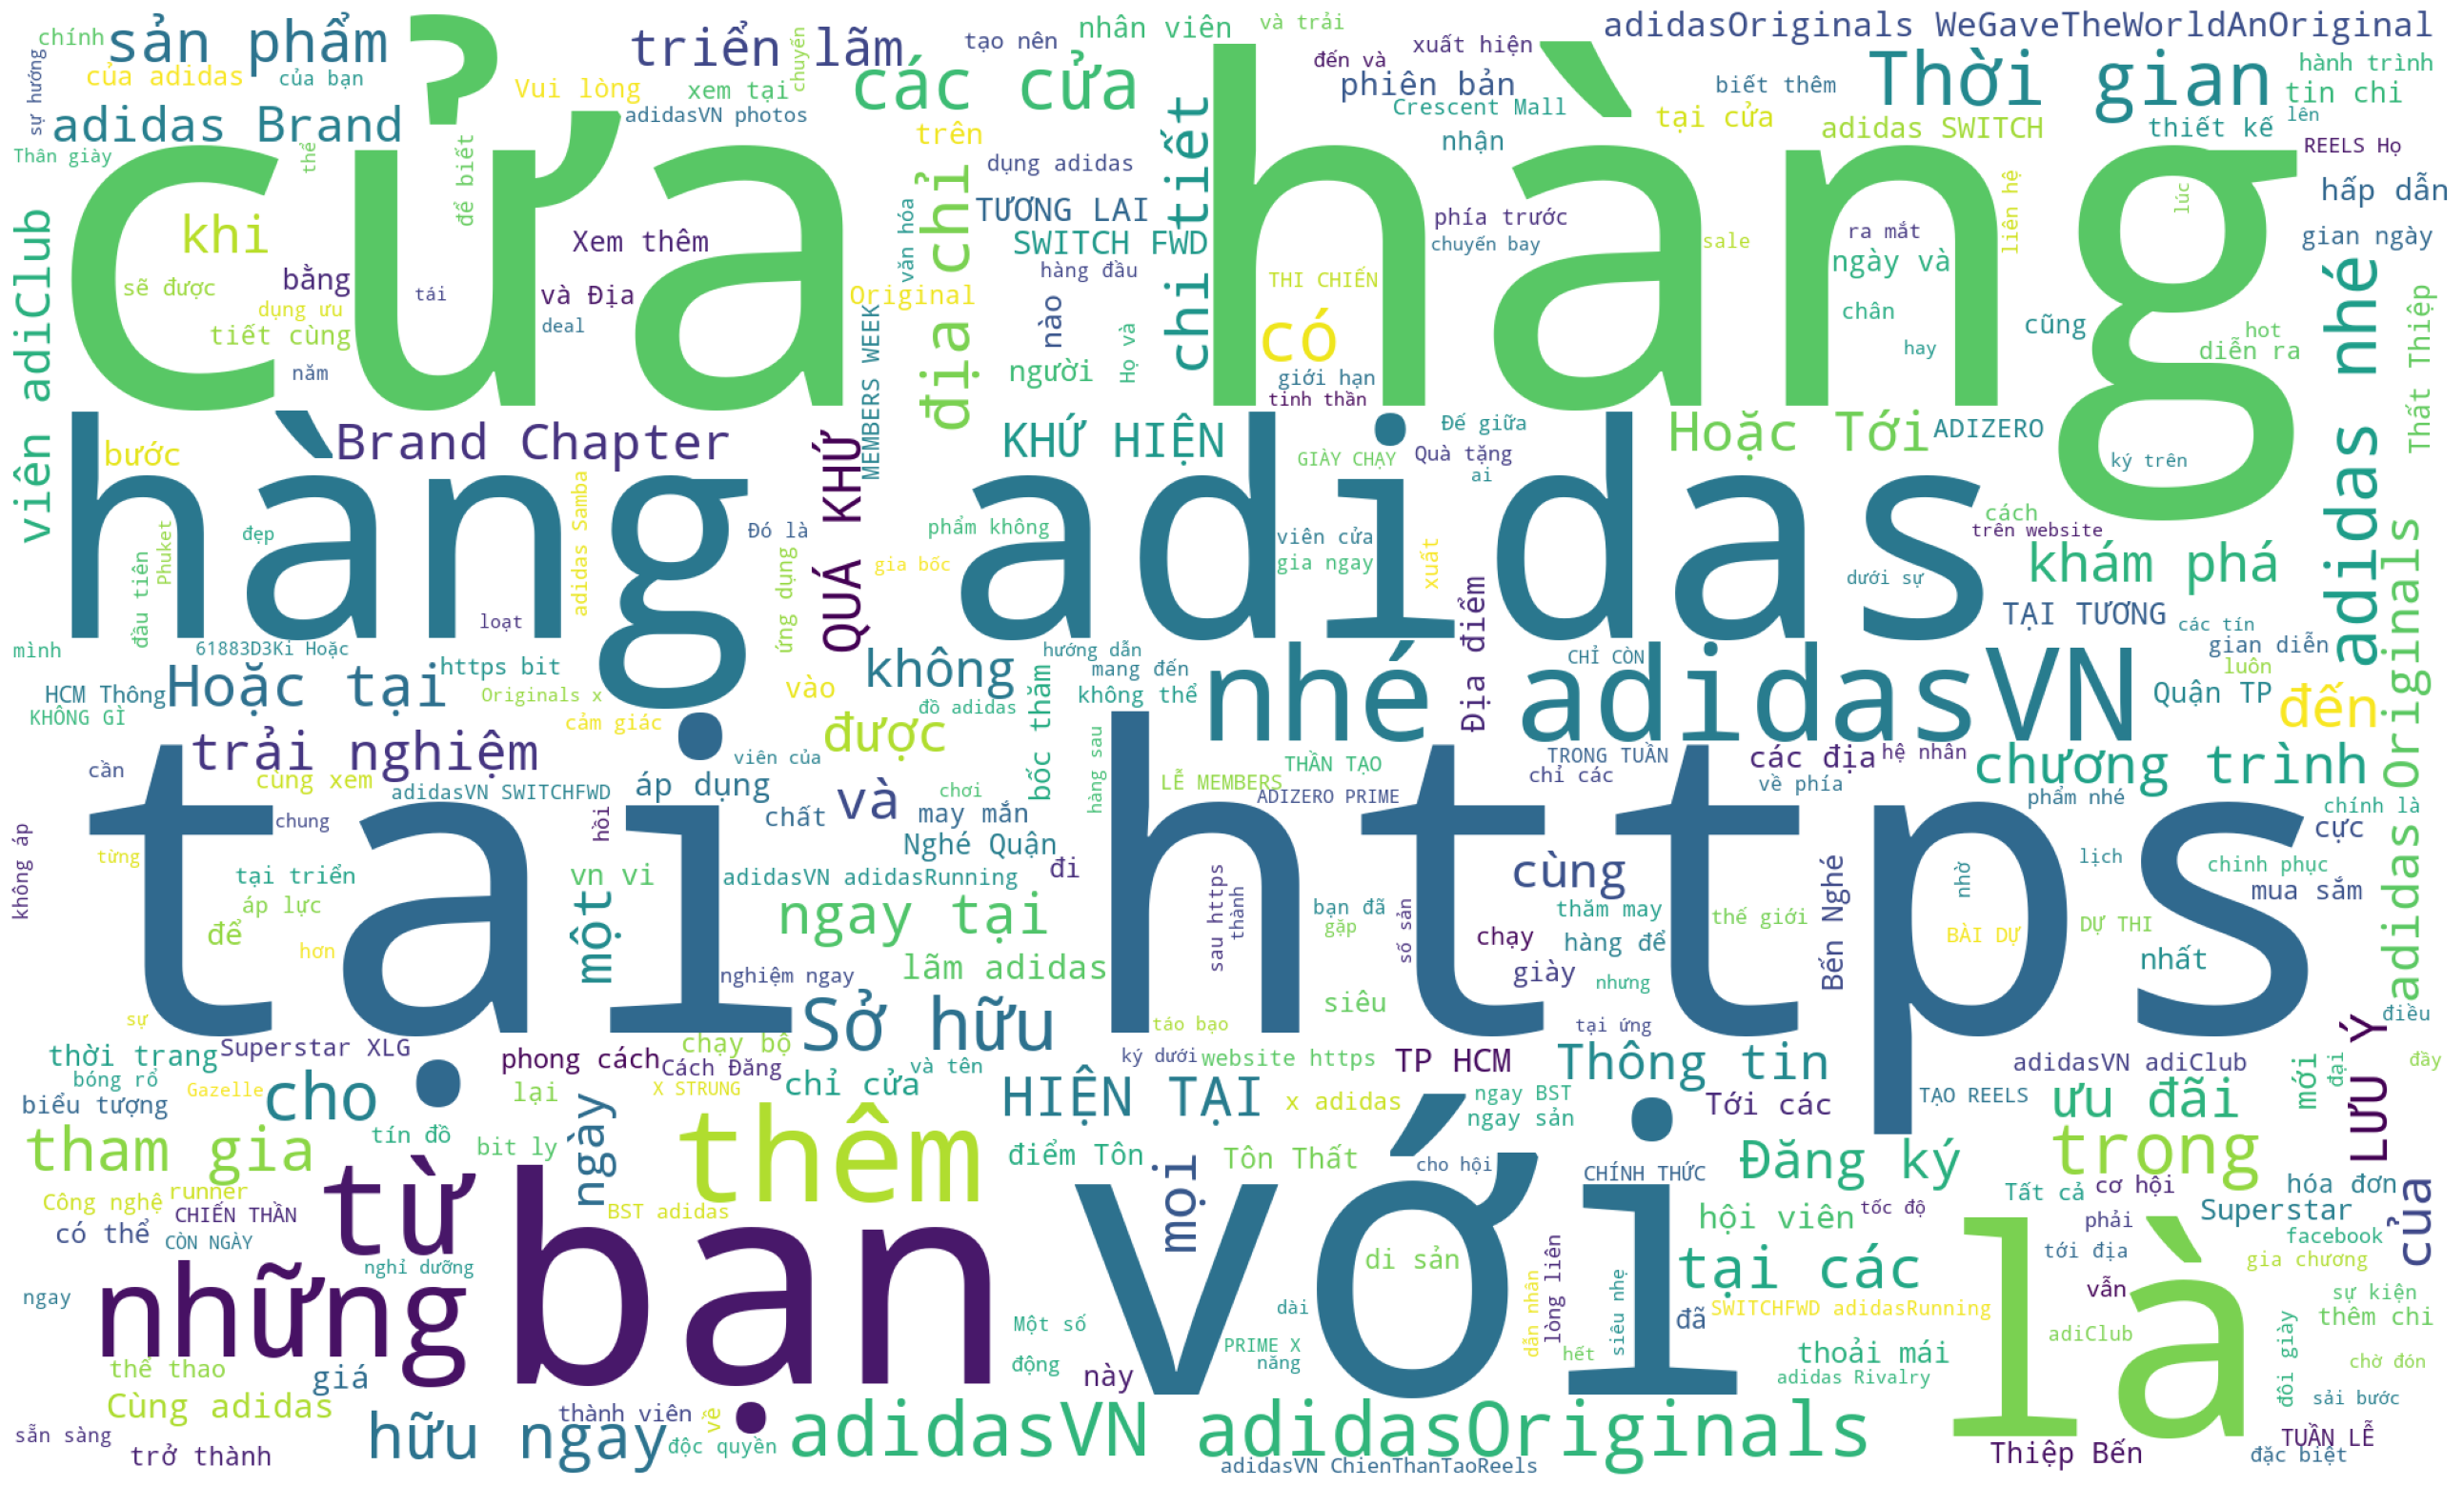

In [109]:
# Bao gồm Stopwords
text = ''
for i in raw_df['post_text']:
    i = str(i)
    text=text+i+'\n'
text
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

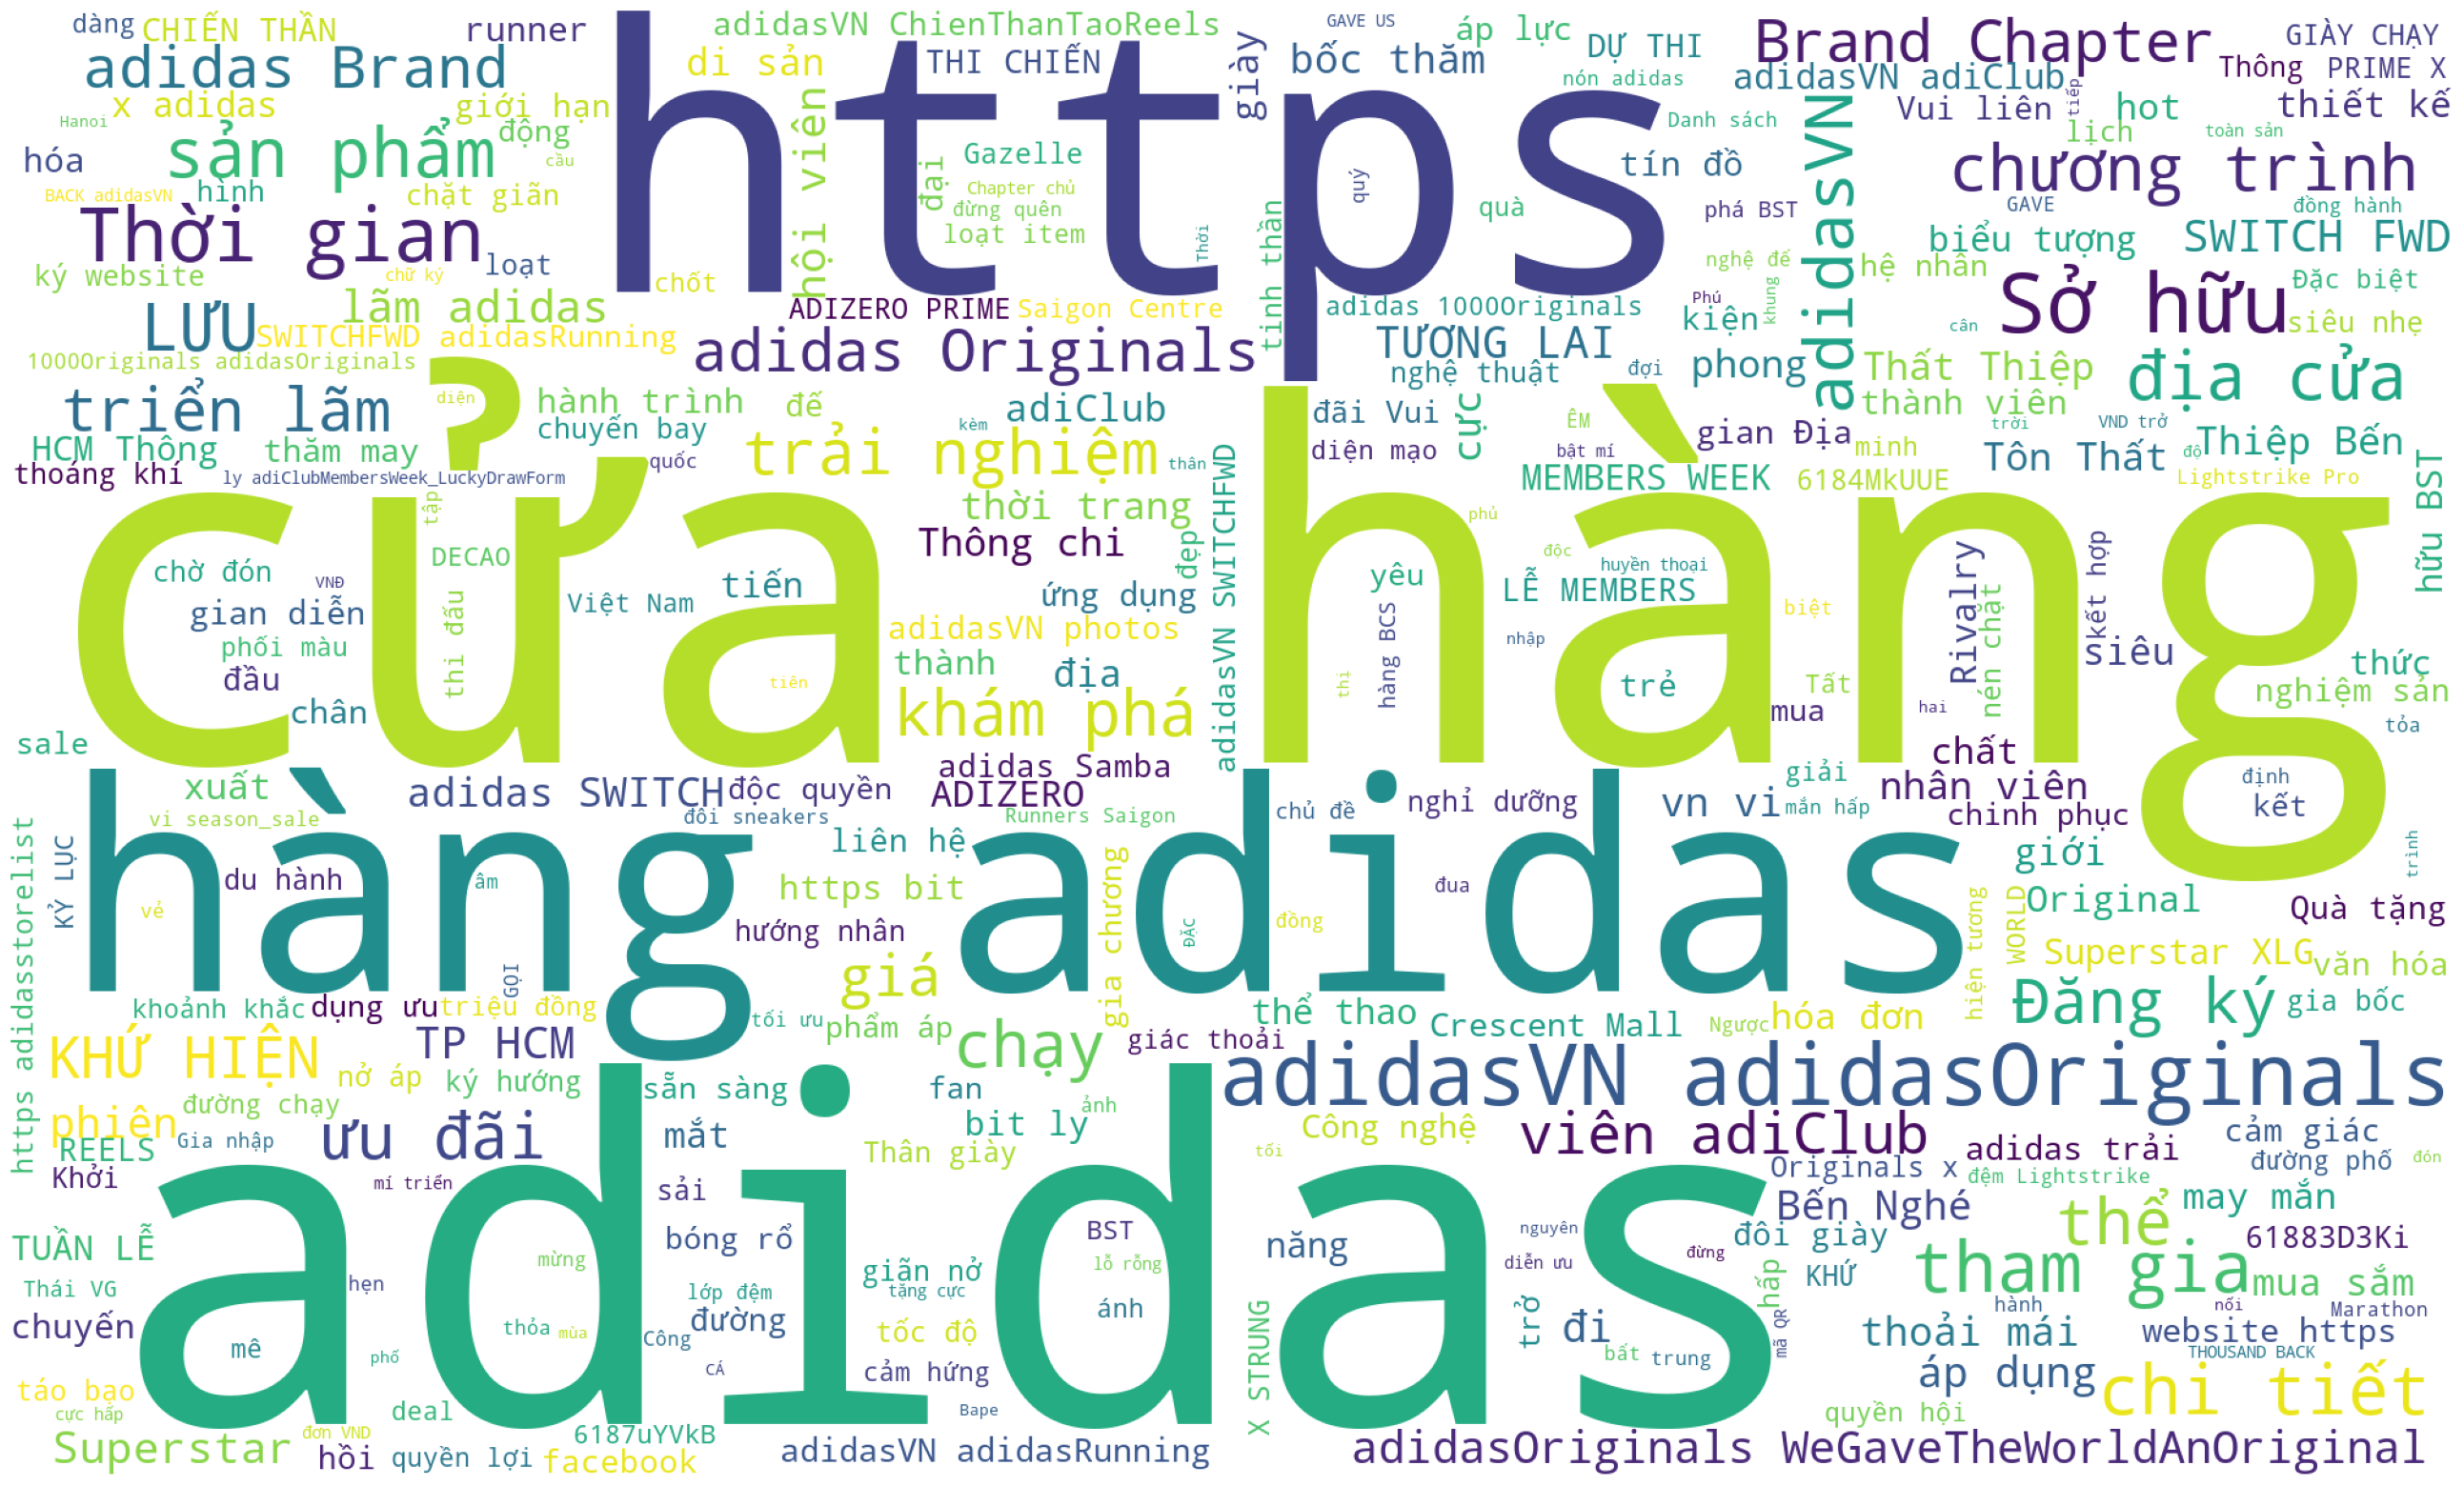

In [110]:
# đã loại bỏ Stopwords
import requests
url = 'https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt'
response = requests.get(url)
vietnamese_stopwords = set(response.text.splitlines())

vietnamese_stopwords.update(STOPWORDS)
for word in vietnamese_stopwords:
    text = text.replace(' ' + word + ' ', ' ')
wordcloud = WordCloud(stopwords=vietnamese_stopwords, background_color='white', max_words=300, width=2000, height=1200).generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(40,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [111]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [112]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

text_cleaned = text.replace('#', '').replace(':', '').replace('.', '').replace('-', '').replace(',','').replace('!','').replace('>','')

# Sử dụng word_tokenize để tách từ
words = word_tokenize(text_cleaned)

# Sử dụng FreqDist để đếm tần suất xuất hiện của từng từ
word_freq = FreqDist(words)
sorted_word_freq = word_freq.most_common()
# In tần suất xuất hiện của từng từ
for word, freq in sorted_word_freq:
    print(f"{word}: {freq} lần")

adidas: 223 lần
hàng: 121 lần
adidasVN: 119 lần
cửa: 97 lần
tại: 82 lần
👉: 81 lần
nhé: 79 lần
Hoặc: 54 lần
adidasOriginals: 53 lần
1: 46 lần
trình: 42 lần
hữu: 41 lần
gia: 40 lần
adiClub: 40 lần
viên: 39 lần
sản: 39 lần
2: 38 lần
phẩm: 35 lần
*: 35 lần
Originals: 35 lần
gian: 34 lần
tiết: 33 lần
giày: 33 lần
dụng: 33 lần
phá: 33 lần
Sở: 31 lần
chi: 30 lần
%: 30 lần
hóa: 30 lần
thể: 29 lần
ADIDAS: 29 lần
địa: 29 lần
Cùng: 28 lần
3: 28 lần
ký: 28 lần
chạy: 27 lần
tham: 27 lần
áp: 26 lần
WeGaveTheWorldAnOriginal: 26 lần
thời: 25 lần
Thời: 25 lần
ưu: 25 lần
hành: 24 lần
nghiệm: 24 lần
“: 24 lần
chương: 23 lần
Địa: 23 lần
BST: 23 lần
triển: 22 lần
thành: 21 lần
trải: 21 lần
?: 21 lần
Superstar: 21 lần
TẠI: 20 lần
đường: 19 lần
giới: 19 lần
đãi: 19 lần
TPHCM: 19 lần
adidasRunning: 18 lần
(: 18 lần
): 18 lần
Thông: 18 lần
lãm: 18 lần
hội: 17 lần
Quận: 17 lần
siêu: 17 lần
cực: 17 lần
mua: 17 lần
hấp: 17 lần
16: 17 lần
đi: 17 lần
900: 17 lần
✅: 16 lần
HIỆN: 16 lần
Bến: 16 lần
Nghé: 16 lần
”: 16

# Phân tích xu hướng 

In [113]:
df_with_detailed_reactions['time'] = pd.to_datetime(df_with_detailed_reactions['time'])

In [114]:
df_with_detailed_reactions['date'] = df_with_detailed_reactions['time'].dt.date
df_with_detailed_reactions['hour'] = df_with_detailed_reactions['time'].dt.hour
df_with_detailed_reactions['day_of_week'] = df_with_detailed_reactions['time'].dt.dayofweek  

In [115]:
df_with_detailed_reactions['total_likes'] = df_with_detailed_reactions['thích'].sum()
df_with_detailed_reactions['total_comments'] = df_with_detailed_reactions['comments'].sum()
df_with_detailed_reactions['total_shares'] = df_with_detailed_reactions['shares'].sum()

In [116]:
interaction_by_date = df_with_detailed_reactions.groupby('date')[['total_likes', 'total_comments', 'total_shares']].sum()
interaction_by_hour = df_with_detailed_reactions.groupby('hour')[['total_likes', 'total_comments', 'total_shares']].sum()
post_by_hour = df_with_detailed_reactions.groupby('hour').size()

In [117]:
interaction_by_date

total_likes  total_comments  total_shares
date                                                 
2023-06-28      14933.0            1426           337
2023-07-16      14933.0            1426           337
2023-07-26      14933.0            1426           337
2023-07-28      14933.0            1426           337
2023-08-01      14933.0            1426           337
...                 ...             ...           ...
2023-11-24      14933.0            1426           337
2023-11-25      14933.0            1426           337
2023-11-26      14933.0            1426           337
2023-11-28      29866.0            2852           674
2023-11-29      29866.0            2852           674

[73 rows x 3 columns]

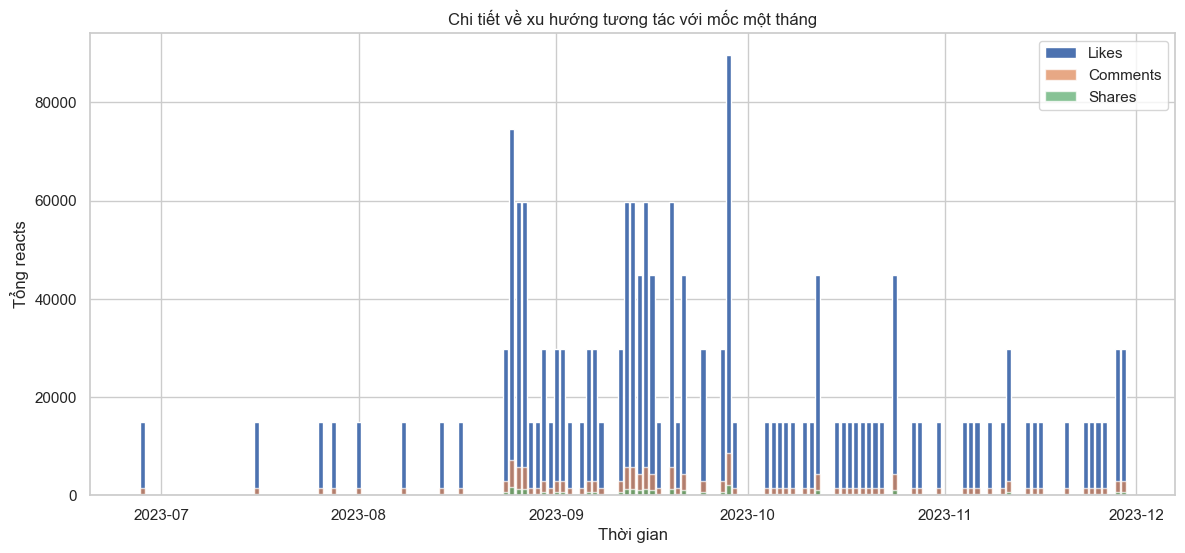

In [118]:
# Thiết lập kích thước biểu đồ
plt.figure(figsize=(14, 6))

# Vẽ biểu đồ cho lượt thích, bình luận và chia sẻ
plt.bar(interaction_by_date.index, interaction_by_date['total_likes'], label='Likes')
plt.bar(interaction_by_date.index, interaction_by_date['total_comments'], label='Comments', alpha=0.7)
plt.bar(interaction_by_date.index, interaction_by_date['total_shares'], label='Shares', alpha=0.7)

# Đặt tên cho các trục và tiêu đề
plt.xlabel('Thời gian')
plt.ylabel('Tổng reacts')
plt.title('Chi tiết về xu hướng tương tác với mốc một tháng')

# Thêm chú thích cho biểu đồ
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [119]:
#Đợt sale hè, backtoschool

In [120]:
interaction_by_hour

total_likes  total_comments  total_shares
hour                                           
9         14933.0            1426           337
10        59732.0            5704          1348
11       134397.0           12834          3033
12       134397.0           12834          3033
13        59732.0            5704          1348
14       238928.0           22816          5392
15        89598.0            8556          2022
16        44799.0            4278          1011
17        44799.0            4278          1011
18       194129.0           18538          4381
19       119464.0           11408          2696
20       567454.0           54188         12806
21        74665.0            7130          1685
22        29866.0            2852           674
23        14933.0            1426           337

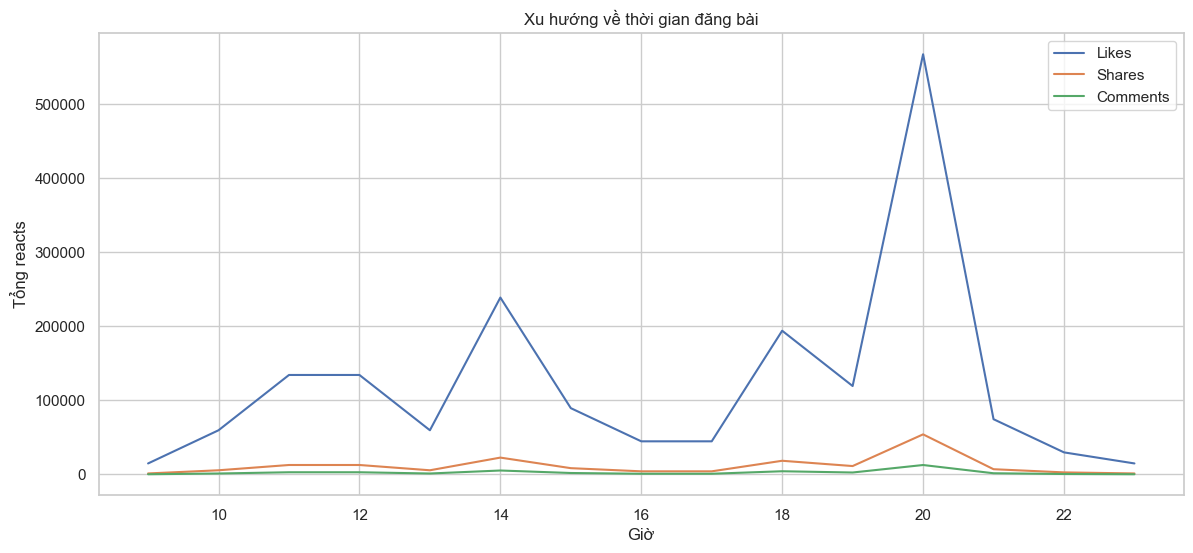

In [121]:
plt.figure(figsize=(14, 6))
plt.plot(interaction_by_hour.index, interaction_by_hour['total_likes'], label = "Likes")
plt.plot(interaction_by_hour.index, interaction_by_hour['total_comments'], label ="Shares")
plt.plot(interaction_by_hour.index, interaction_by_hour['total_shares'], label = "Comments")
plt.xlabel('Giờ')
plt.ylabel('Tổng reacts')
plt.title('Xu hướng về thời gian đăng bài')
plt.legend()
plt.show()


In [122]:
post_by_hour

hour
9      1
10     4
11     9
12     9
13     4
14    16
15     6
16     3
17     3
18    13
19     8
20    38
21     5
22     2
23     1
dtype: int64

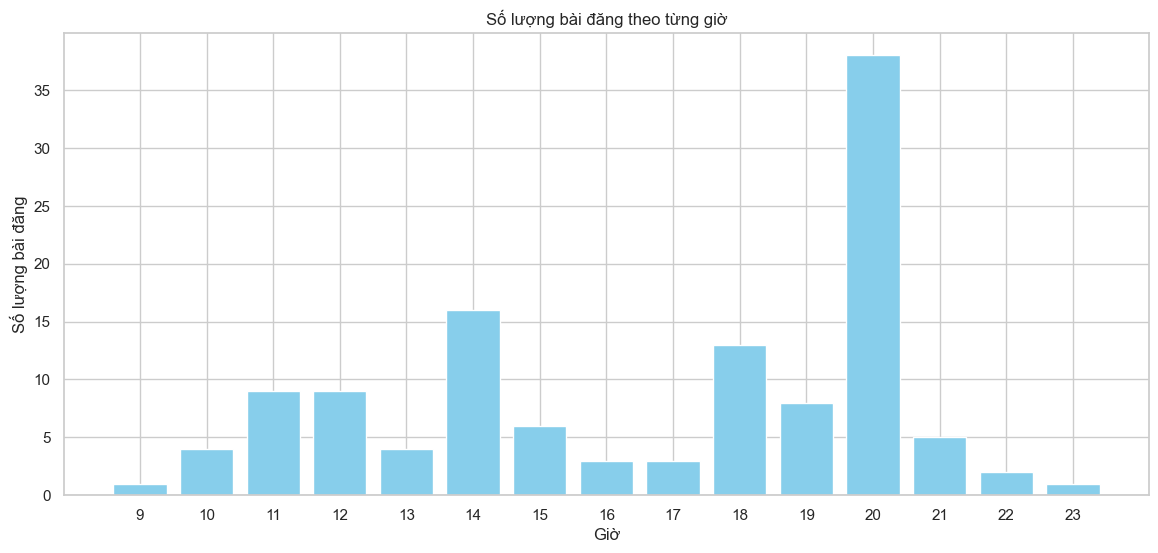

In [123]:
# Vẽ biểu đồ
plt.figure(figsize=(14, 6))
plt.bar(x=post_by_hour.index, height=post_by_hour, color= 'skyblue')
plt.title('Số lượng bài đăng theo từng giờ')
plt.xlabel('Giờ')
plt.ylabel('Số lượng bài đăng')
all_hours = post_by_hour.index[::1]
plt.xticks(all_hours)

plt.show()